<a href="https://colab.research.google.com/github/NeznaikanaLune/MISIS_DS_Masters_degree_2020/blob/master/smriz_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Проблема**

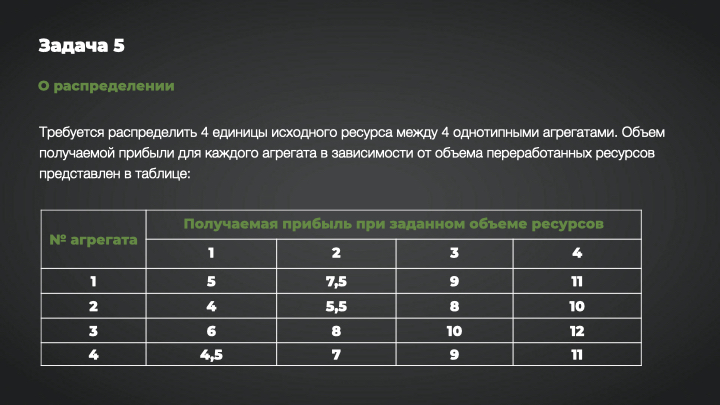

# **2. Содержательная постановка задачи**

Сколько едениц ресурса переработать на каждом из 4х агрегатов для максимизации прибыли с учетом того, что изначально имеется 4 единицы ресурса.

# **3. Формальная математическая модель**

Пусть имеется i - агрегатов и j технологий.

$X_{[i,j]}= \begin{vmatrix}
\ X_{11} & X_{12} & X_{13} &X_{14}  \\
\ X_{21} & X_{22} &X_{23} & X_{24} \\
\ X_{31} & X_{32} &X_{33} & X_{34} \\
\ X_{41} & X_{42} & X_{43} & X_{44}
\end{vmatrix}$ - переаботать или нет j единиц ресурса на агрегате i

$A_{[i,j]}= \begin{vmatrix}
\ 5 &  7.5 & 9 &11  \\
\ 4 & 5.5 &8 & 10 \\
\ 6 & 8 &10 & 12 \\
\ 4.5 & 7 & 9 & 11
\end{vmatrix}$

$i=[1,2,3,4]$ - объем ресурсов

$j=[1,2,3,4]$ - номер агрегата

Математическая модель:

$\begin{equation*}
\left\{
  \begin{array}{lr}
  X_i \geq 0\ по\ определению\ X\ неотрицательный\\
  X_i\leq 1\ для\ бинаризации X\\
  \sum_{i=1}^4\sum_{j=1}^4 w_ix_{ji} = 4 - ограничение\ по\ кол-ву\ единиц\ исходного\ ресурса\\ 
  \sum\limits_{i=1}^4\sum\limits_{j=1}^4A_{ij}X_{ij} \rightarrow \max\ целевая\ функция\ итоговой\ прибыли\ для\ максимизации\\
  \end{array}
\right.
\end{equation*}$

# **4.	Алгоритм и ПО**

•	Линейное программирование, метод главного критерия, квази-лексикографическая оптимизация;

•	Google Collab (Python)– среда разработки; 

•	Numpy - open-source модуль для python, который предоставляет общие математические и числовые операции в виде пре-скомпилированных, быстрых функций;

•	cvxpy-python модуль для решения задач выпуклой оптимизации.

Данную работу также можно посмотреть по [ссылке](https://colab.research.google.com/drive/1wIf1RrbN9uJJUxSLBSyLn7kxVa08t3bO?usp=sharing) и запустить код. Это ссылка на данную работу, но оформленную в Goggle Colab. Goggle Colab — это бесплатная среда для ноутбуков Jupyter, предоставляемая Google. Для запуска нужен только браузер и доступ в интернет.

# **5.	Решение задачи**

In [ ]:
import numpy as np
import cvxpy

A = np.array([[5,7.5,9,11],[4,5.5,8,10],[6,8,10,12],[4.5,7,9,11]])
w= np.array([1,2,3,4])#объем ресурса

x = cvxpy.Variable(shape=A.shape, integer = True)
total_cost = cvxpy.sum(cvxpy.multiply(A, x))
C0 = x>=0
C1 = x<=1
C2 = cvxpy.sum(x,axis=1)<=1 #сумма по строке
C3 = cvxpy.sum(w*x.T)==4

problem = cvxpy.Problem(cvxpy.Maximize(total_cost), constraints=[C0,C1,C2,C3])

print('Суммарная прибыль:',round(problem.solve(),2),'\nРаспределение ресурсов по агрегатам:\n',x.value,'\n Единиц ресурса к переработке на агрегате 1:',(w@x.value.T)[0],'\n Единиц ресурса к переработке на агрегате 2:',(w@x.value.T)[1],'\n Единиц ресурса к переработке на агрегате 3:',(w@x.value.T)[2],'\n Единиц ресурса к переработке на агрегате 4:',(w@x.value.T)[3])

Суммарная прибыль: 19.5 
Распределение ресурсов по агрегатам:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 
 Единиц ресурса к переработке на агрегате 1: 1.0 
 Единиц ресурса к переработке на агрегате 2: 1.0 
 Единиц ресурса к переработке на агрегате 3: 1.0 
 Единиц ресурса к переработке на агрегате 4: 1.0


# **6.	Анализ полученных результатов**
Для получения наибольшей прибыли необходимо переработать по  одной единице ресурса на кажом из агрегатов. Тогда суммарная прибыль составит 19.5 денежных единиц.

# Задача

Имеется набор курсов заданной стоимости. Найти такое сочетание курсов, при котором суммарная стоимость будет максимлаьна, но при этом не превышать 45000 рублей.

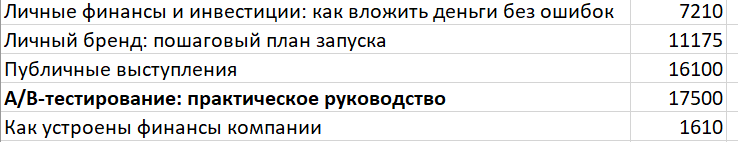

In [ ]:
import numpy as np
import cvxpy

C = np.array([7200,11175,16100,17500,1610])
x = cvxpy.Variable(shape=5, boolean=True)
total_cost = cvxpy.sum(cvxpy.multiply(C, x))
C0 = total_cost<=45000
problem = cvxpy.Problem(cvxpy.Maximize(total_cost), constraints=[C0])
problem.solve()

44775.0

In [ ]:
x.value

array([0., 1., 1., 1., 0.])